# Learning a Transfer Operator (Perron-Frobenius Operator) from Dynamical System Data

In this tutorial, we will learn how to compute a Transfer Operator (Perron-Frobenius operator) for a dynamical system from data. We will use the logistic map as our example dynamical system.

The logistic map is defined by the recurrence relation below, where \( r \) is a parameter.





$$ 
x_{n+1} = r x_n (1 - x_n)
$$


## Step-by-Step Implementation

1. Import necessary libraries.
2. Generate example data from the logistic map.
3. Discretize the state space and build the transfer operator from the data.
4. Visualize the computed transfer operator.

Let's begin!

## Step 1: Import Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Generate Example Data from the Logistic Map

We will generate a time series from the logistic map by iterating the recurrence relation.


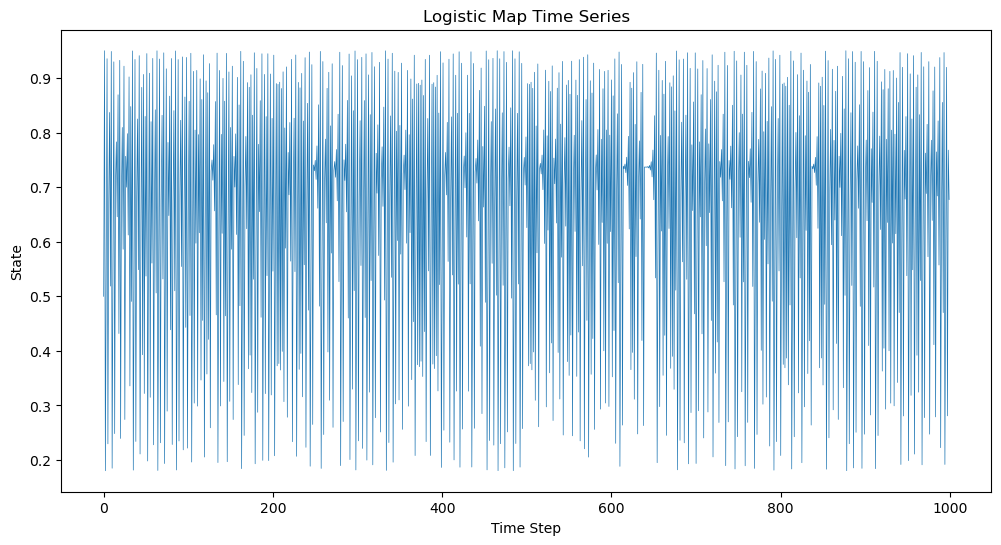

In [2]:
def logistic_map(x, r):
    return r * x * (1 - x)

# Parameters
r = 3.8   # Logistic map parameter
num_iter = 10000   # Number of iterations to generate data
x0 = 0.5   # Initial condition

# Generate data
data = np.zeros(num_iter)
data[0] = x0
for i in range(1, num_iter):
    data[i] = logistic_map(data[i-1], r)

# Plot the generated data
plt.figure(figsize=(12, 6))
plt.plot(data[:1000], lw=0.5)
plt.title("Logistic Map Time Series")
plt.xlabel("Time Step")
plt.ylabel("State")
plt.show()


## Step 3: Discretize the State Space and Build the Transfer Operator from the Data

We will discretize the state space and count the transitions between states to build the transfer operator.


In [3]:
# Discretize the state space
num_bins = 50
bins = np.linspace(0, 1, num_bins + 1)
digitized_data = np.digitize(data, bins) - 1  # Bin indices

# Build transfer operator
P = np.zeros((num_bins, num_bins))

for (i, j) in zip(digitized_data[:-1], digitized_data[1:]):
    P[i, j] += 1

# Normalize the rows to get probabilities
P = P / P.sum(axis=1, keepdims=True)
P[np.isnan(P)] = 0  # Handle rows that sum to zero




/var/folders/l6/d0sk3wb15wz95r64rr596m_80000gn/T/ipykernel_47819/559289672.py:13: RuntimeWarning: invalid value encountered in divide
  P = P / P.sum(axis=1, keepdims=True)


## Step 4: Visualize the Computed Transfer Operator

Finally, we visualize the computed transfer operator to understand the state transitions better.

The matrix $( P )$ we computed represents the probabilities of transitioning from one state to another in the discretized state space.

If the state space is discretized into $( N )$ bins, the elements of the matrix $( P $) are defined as:

$$
P_{ij} = \frac{\text{Number of transitions from bin } i \text{ to bin } j}{\text{Total number of transitions from bin } i}
$$

Where $( P_{ij} )$ is the estimated probability of transitioning from state $( i )$ to state $( j )$.

Let's visualize the state space transitions and the computed transfer operator.



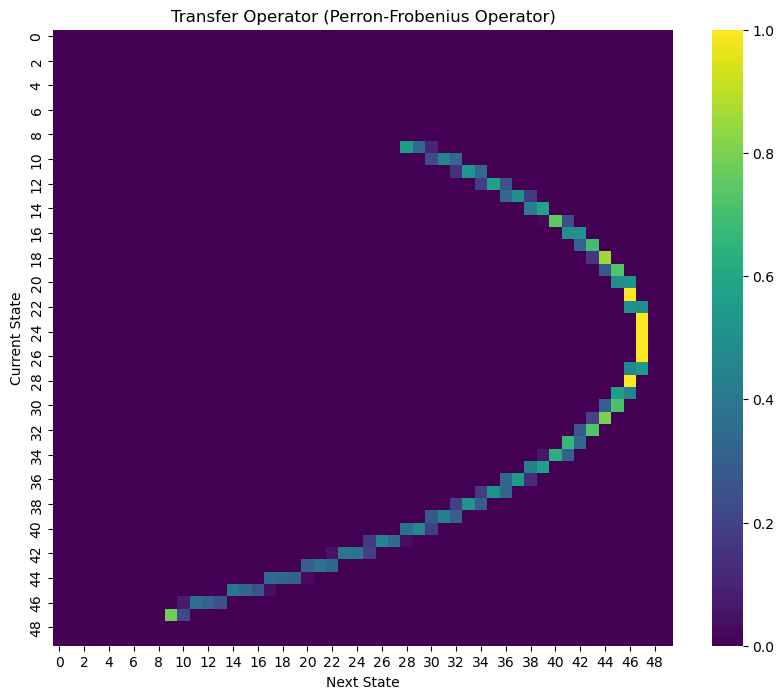

In [4]:
# Plot the computed transfer operator
plt.figure(figsize=(10, 8))
sns.heatmap(P, cmap='viridis')
plt.title("Transfer Operator (Perron-Frobenius Operator)")
plt.xlabel("Next State")
plt.ylabel("Current State")
plt.show()

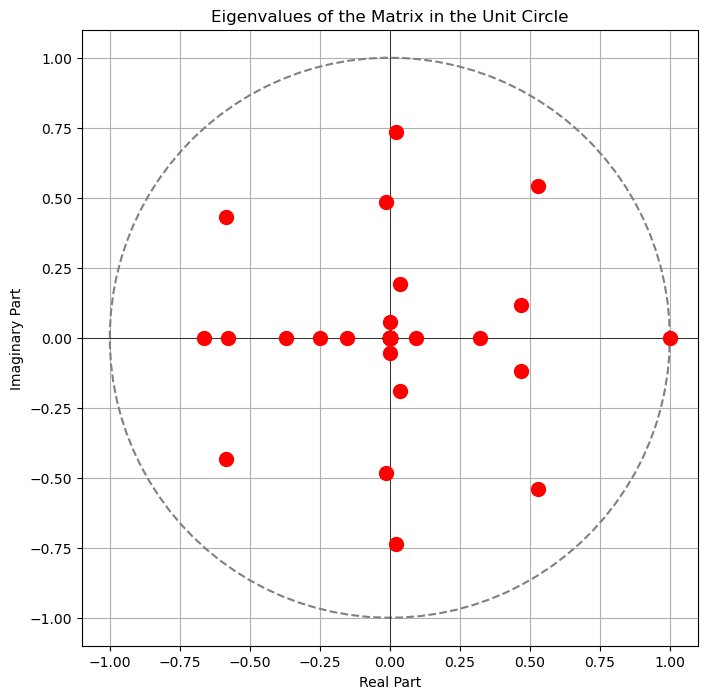

In [5]:
# Compute eigenvalues
eigenvalues = np.linalg.eigvals(P)

# Unit circle
theta = np.linspace(0, 2 * np.pi, 100)
circle_x = np.cos(theta)
circle_y = np.sin(theta)

# Plot the eigenvalues
plt.figure(figsize=(8, 8))
plt.plot(circle_x, circle_y, linestyle='--', color='grey')  # Unit circle
plt.scatter(eigenvalues.real, eigenvalues.imag, color='red', s=100, zorder=5)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title("Eigenvalues of the Matrix in the Unit Circle")
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


## Conclusion

In this tutorial, we learned how to compute a Transfer Operator (Perron-Frobenius operator) for a dynamical system from data, using the logistic map as an example. We discretized the state space, counted transitions, and normalized them to form the probability transition matrix.

This approach provides valuable insights into the dynamics of the system and can be extended to more complex systems.

Happy modeling!

---